In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data


In [40]:
df = pd.read_csv("../data/raw/train.csv")

In [41]:
df.head()

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption
0,01/01/2002 00,1,Studio,15.31,46.61,1.06,0.97,Low,0,Swimming Pool,0.0,64.85
1,01/01/2002 08,4,NaN,21.01,66.11,2.98,0.91,Upper Middle,1,Swimming Pool,1.0,192.50
2,01/01/2002 16,2,Cottage,12.86,60.86,1.44,1.43,Middle,0,NaN,1.0,116.62
3,02/01/2002 00,2,1BHK,20.16,50.58,1.48,0.91,Middle,-1,Garden,0.0,76.96
4,02/01/2002 08,2,Cottage,16.23,52.25,1.14,1.11,Middle,0,Fountain,0.0,104.70


# Understanding Data

| Column name              | Description                                                  |
| ------------------------ | ------------------------------------------------------------ |
| Timestamp                | Represents a unique timestamp of an entry                    |
| Residents                | Represents the number of people living in the household      |
| Apartment_Type           | Represents the type of apartment                             |
| Temperature              | Represents the average temperature of that time period       |
| Humidity                 | Represents the average humidity of that time period          |
| Water_Price              | Represents the water price for that time period              |
| Period_Consumption_Index | Represents the relative water usage for each 8-hour period   |
| Income_Level             | Represents the income level of household                     |
| Guests                   | Represents the number of guests                              |
| Amenities                | Represents the types of amenities available in the household |
| Appliance_Usage          | Represents whether water appliances are being used or not    |
| Water_Consumption        | Represents the consumption of water in that period           |


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 14000 non-null  object 
 1   Residents                 14000 non-null  int64  
 2   Apartment_Type            13574 non-null  object 
 3   Temperature               13559 non-null  float64
 4   Humidity                  14000 non-null  object 
 5   Water_Price               14000 non-null  float64
 6   Period_Consumption_Index  14000 non-null  float64
 7   Income_Level              13574 non-null  object 
 8   Guests                    14000 non-null  int64  
 9   Amenities                 8003 non-null   object 
 10  Appliance_Usage           13585 non-null  float64
 11  Water_Consumption         14000 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 1.3+ MB


🔍 Observations:

1. There are a total of 14000 entries
2. Some columns have missing values
3. There are 10 features and 1 target variable
4. Categorical Features include - Apartment_Type, Income_Level, Ameneties, Applicane Usage (Yes/No)
5. Numerical Features include - Residents, Tempetature, Humidity, Water_Price, Period_Consumption_Index, Guests
6. Target Variable - Water_Consumption


## Univariate Analysis


### Timestamp


In [43]:
df["Timestamp"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14000 entries, 0 to 13999
Series name: Timestamp
Non-Null Count  Dtype 
--------------  ----- 
14000 non-null  object
dtypes: object(1)
memory usage: 109.5+ KB


In [44]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%d/%m/%Y %H", errors="coerce")

In [45]:
df["Timestamp"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14000 entries, 0 to 13999
Series name: Timestamp
Non-Null Count  Dtype         
--------------  -----         
14000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 109.5 KB


In [46]:
# Seperating these out into two different columns - Date and Hour
df["Date"] = df["Timestamp"].dt.date
df["Hour"] = df["Timestamp"].dt.hour

In [47]:
df[["Timestamp", "Date", "Hour"]]

,Timestamp,Date,Hour
0,2002-01-01 00:00:00,2002-01-01,0
1,2002-01-01 08:00:00,2002-01-01,8
2,2002-01-01 16:00:00,2002-01-01,16
3,2002-01-02 00:00:00,2002-01-02,0
4,2002-01-02 08:00:00,2002-01-02,8
...,...,...,...
13995,2014-10-10 00:00:00,2014-10-10,0
13996,2014-10-10 08:00:00,2014-10-10,8
13997,2014-10-10 16:00:00,2014-10-10,16
13998,2014-10-11 00:00:00,2014-10-11,0


### Residents


In [48]:
df["Residents"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14000 entries, 0 to 13999
Series name: Residents
Non-Null Count  Dtype
--------------  -----
14000 non-null  int64
dtypes: int64(1)
memory usage: 109.5 KB


<Axes: xlabel='Residents', ylabel='Density'>

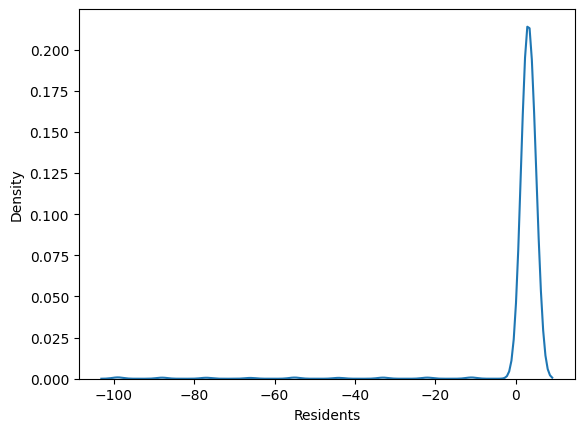

In [49]:
sns.kdeplot(df["Residents"])

In [50]:
print(
    f"Percentage of rows having residents below or equal to 0 is: {(len(df[df["Residents"] <= 0]) / len(df)) * 100} %"
)

Percentage of rows having residents below or equal to 0 is: 2.0 %


Should we remove this 2% of data ?


In [51]:
# Observing water consumption where residents are less than or equal to 0.
df[df["Residents"] <= 0]

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption,Date,Hour
13,2002-01-05 08:00:00,-11,Studio,14.50,70.0,1.56,1.14,Low,1,Swimming Pool,0.0,75.05,2002-01-05,8
49,2002-01-17 08:00:00,-66,Bungalow,10.18,48.38,2.93,1.36,Upper Middle,0,Jacuzzi,0.0,175.97,2002-01-17,8
53,2002-01-18 16:00:00,-99,Bungalow,30.79,42.0,1.72,1.33,Upper Middle,0,Swimming Pool,0.0,319.47,2002-01-18,16
197,2002-03-07 16:00:00,-99,1BHK,19.12,62.0,1.60,1.00,Low,0,Swimming Pool,0.0,86.04,2002-03-07,16
211,2002-03-12 08:00:00,-88,1BHK,26.91,68.6,1.24,1.41,Middle,1,NaN,1.0,147.66,2002-03-12,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13852,2014-08-23 08:00:00,-66,1BHK,17.53,73.23,1.27,0.91,Low,1,Garden,0.0,85.12,2014-08-23,8
13863,2014-08-27 00:00:00,-11,2BHK,NaN,63.43,1.28,0.86,Middle,0,NaN,1.0,134.61,2014-08-27,0
13878,2014-09-01 00:00:00,-66,1BHK,12.14,57.87,1.54,1.40,Low,0,Garden,1.0,108.97,2014-09-01,0
13898,2014-09-07 16:00:00,-77,2BHK,24.01,55.88,2.81,1.01,Upper Middle,0,Jacuzzi,0.0,191.52,2014-09-07,16


### Apartment_Type


In [52]:
df["Apartment_Type"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14000 entries, 0 to 13999
Series name: Apartment_Type
Non-Null Count  Dtype 
--------------  ----- 
13574 non-null  object
dtypes: object(1)
memory usage: 109.5+ KB


In [53]:
df["Apartment_Type"].unique()

array(['Studio', nan, 'Cottage', '1BHK', '2BHK', 'Bungalow', '3BHK',
       'Detached'], dtype=object)

In [54]:
df["Apartment_Type"].value_counts()

Apartment_Type
2BHK        3157
1BHK        3019
Bungalow    1925
3BHK        1909
Cottage     1824
Studio      1186
Detached     554
Name: count, dtype: int64

<Axes: xlabel='Apartment_Type', ylabel='count'>

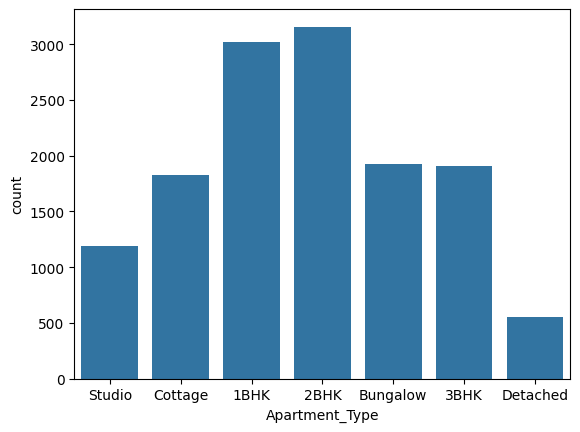

In [55]:
sns.countplot(x="Apartment_Type", data=df)

In [56]:
round((len(df[df["Apartment_Type"].isnull()]) / len(df)) * 100, 2)

3.04

3.04 % of this data has null Apartment_Types, how to handle this?


### Temperature


In [57]:
df["Temperature"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14000 entries, 0 to 13999
Series name: Temperature
Non-Null Count  Dtype  
--------------  -----  
13559 non-null  float64
dtypes: float64(1)
memory usage: 109.5 KB


In [58]:
df["Temperature"].describe()

count    13559.000000
mean        22.566559
std          7.216447
min         10.000000
25%         16.340000
50%         22.580000
75%         28.850000
max         35.000000
Name: Temperature, dtype: float64

<Axes: xlabel='Temperature', ylabel='Count'>

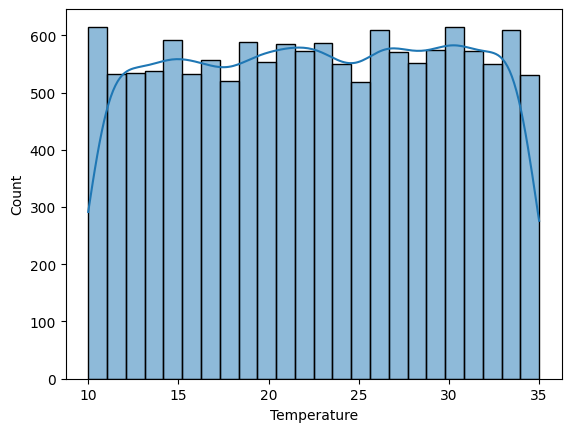

In [59]:
sns.histplot(df["Temperature"], kde=True)

In [75]:
df[df["Temperature"].isnull()]

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption,Date,Hour
10,2002-01-04 08:00:00,3,2BHK,NaN,63.72,1.14,0.229422,Middle,0,NaN,1.0,91.71,2002-01-04,8
36,2002-01-13 00:00:00,5,Bungalow,NaN,60.18,2.39,1.060000,Upper Middle,1,Jacuzzi,1.0,284.16,2002-01-13,0
54,2002-01-19 00:00:00,4,Bungalow,NaN,54.11,1.55,0.880000,Upper Middle,0,Swimming Pool,0.0,169.06,2002-01-19,0
100,2002-02-03 08:00:00,3,1BHK,NaN,48.16,1.75,1.380000,Middle,0,NaN,0.0,145.27,2002-02-03,8
112,2002-02-07 08:00:00,4,Detached,NaN,49.47,1.82,1.280000,Rich,1,Jacuzzi,1.0,417.21,2002-02-07,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13879,2014-09-01 08:00:00,1,Studio,NaN,64.99,1.78,1.460000,Low,0,Swimming Pool,1.0,107.35,2014-09-01,8
13899,2014-09-08 00:00:00,2,1BHK,NaN,48.66,1.47,1.270000,Middle,0,Fountain,0.0,129.73,2014-09-08,0
13929,2014-09-18 00:00:00,5,Bungalow,NaN,49.71,2.72,1.460000,Upper Middle,0,Swimming Pool,0.0,316.22,2014-09-18,0
13937,2014-09-20 16:00:00,3,Cottage,NaN,38.06,1.28,1.050000,Middle,0,NaN,0.0,113.42,2014-09-20,16


In [76]:
# Replacing Temperature nulls with mean
df.fillna({"Temperature": df["Temperature"].mean()}, inplace=True)

<Axes: xlabel='Temperature', ylabel='Density'>

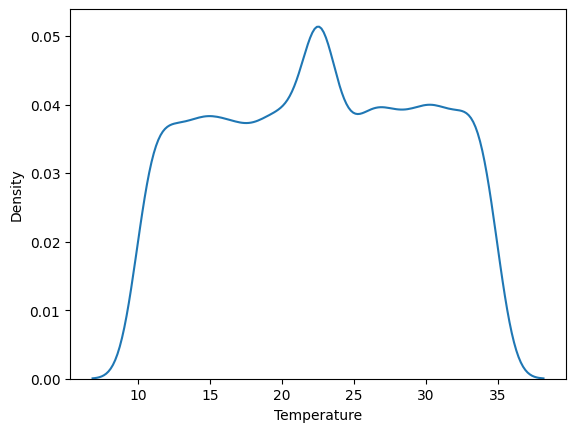

In [78]:
sns.kdeplot(df["Temperature"])

### Humidity


In [60]:
df["Humidity"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14000 entries, 0 to 13999
Series name: Humidity
Non-Null Count  Dtype 
--------------  ----- 
14000 non-null  object
dtypes: object(1)
memory usage: 109.5+ KB


In [61]:
(len(df[~df["Humidity"].str.match(r"^\d*\.?\d*$", na=False)]) / len(df)) * 100

2.835714285714286

In [63]:
df.loc[~df["Humidity"].str.match(r"^\d*\.?\d*$", na=False), "Humidity"] = np.nan

In [64]:
df["Humidity"] = df["Humidity"].astype("float64")
df.loc[df["Humidity"] > 100, "Humidity"] = np.nan

In [65]:
df["Humidity"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14000 entries, 0 to 13999
Series name: Humidity
Non-Null Count  Dtype  
--------------  -----  
13602 non-null  float64
dtypes: float64(1)
memory usage: 109.5 KB


In [66]:
df["Humidity"].describe()

count    13602.000000
mean        53.141759
std         10.184530
min         10.000000
25%         46.200000
50%         53.250000
75%         60.020000
max         90.000000
Name: Humidity, dtype: float64

<Axes: xlabel='Humidity', ylabel='Density'>

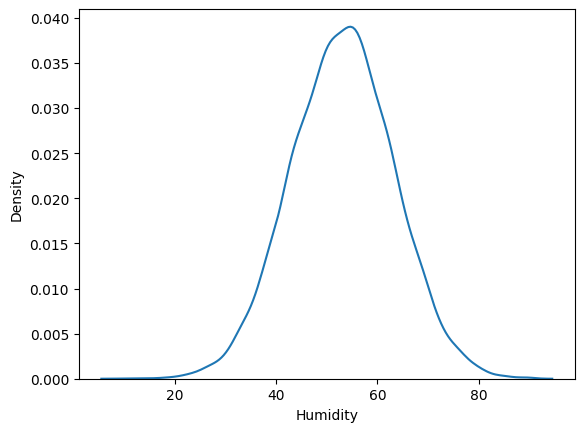

In [67]:
sns.kdeplot(df["Humidity"])

In [71]:
df.fillna({"Humidity": df["Humidity"].mean()}, inplace=True)

In [73]:
df["Humidity"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14000 entries, 0 to 13999
Series name: Humidity
Non-Null Count  Dtype  
--------------  -----  
14000 non-null  float64
dtypes: float64(1)
memory usage: 109.5 KB


<Axes: xlabel='Humidity', ylabel='Density'>

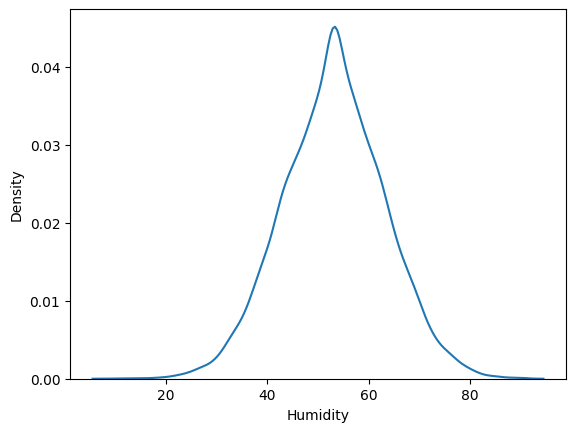

In [74]:
sns.kdeplot(df["Humidity"])

### Water Price


In [81]:
df["Water_Price"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14000 entries, 0 to 13999
Series name: Water_Price
Non-Null Count  Dtype  
--------------  -----  
14000 non-null  float64
dtypes: float64(1)
memory usage: 109.5 KB


<Axes: xlabel='Water_Price', ylabel='Density'>

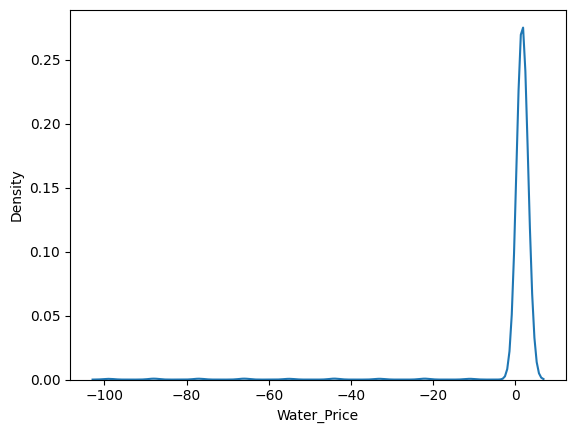

In [82]:
sns.kdeplot(df["Water_Price"])

In [83]:
df["Water_Price"].describe()

count    14000.000000
mean         0.657924
std          8.765776
min        -99.000000
25%          1.320000
50%          1.630000
75%          2.112500
max          3.000000
Name: Water_Price, dtype: float64

In [87]:
(len(df[df["Water_Price"] < 0]) / len(df)) * 100

1.9428571428571426

1.9% of data has negative Water_Price, we will replace that with mean of Water_Price (mean will exclude the negatvie values)


In [88]:
df.loc[df["Water_Price"] < 0, "Water_Price"] = np.nan

In [91]:
df.fillna({"Water_Price": round(df["Water_Price"].mean(), 2)}, inplace=True)

<Axes: ylabel='Density'>

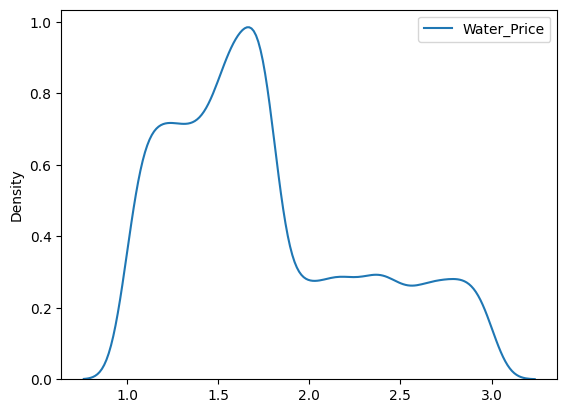

In [92]:
sns.kdeplot(df[["Water_Price"]])

### Period_Consumption_Index

Represents the relative water usage for each 8-hour period


In [94]:
df["Period_Consumption_Index"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14000 entries, 0 to 13999
Series name: Period_Consumption_Index
Non-Null Count  Dtype  
--------------  -----  
14000 non-null  float64
dtypes: float64(1)
memory usage: 109.5 KB


<Axes: xlabel='Period_Consumption_Index', ylabel='Density'>

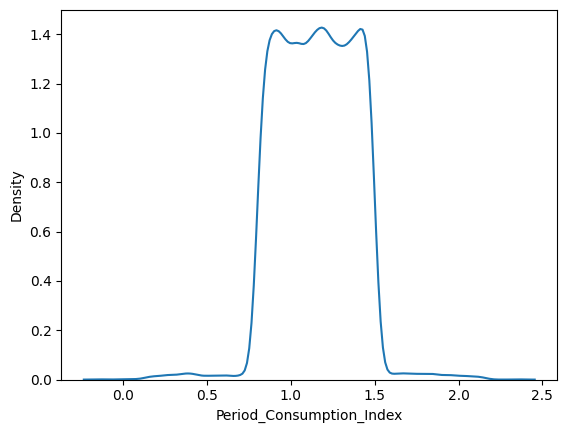

In [95]:
sns.kdeplot(df["Period_Consumption_Index"])

In [96]:
df["Period_Consumption_Index"].describe()

count    14000.000000
mean         1.152890
std          0.229047
min         -0.130782
25%          0.970000
50%          1.150000
75%          1.330000
max          2.352311
Name: Period_Consumption_Index, dtype: float64

In [97]:
df[df["Period_Consumption_Index"] < 0]

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption,Date,Hour
3149,2004-11-15 16:00:00,2,Cottage,25.05,65.70,1.26,-0.130782,zjhwd,0,Garden,0.0,98.54,2004-11-15,16
3355,2005-01-23 08:00:00,4,3BHK,22.77,47.07,2.61,-0.014013,Upper Middle,1,NaN,0.0,240.22,2005-01-23,8


Since the negative values are negligible, we will convert them to positive


In [100]:
df["Period_Consumption_Index"] = df["Period_Consumption_Index"].abs()

<Axes: xlabel='Period_Consumption_Index', ylabel='Density'>

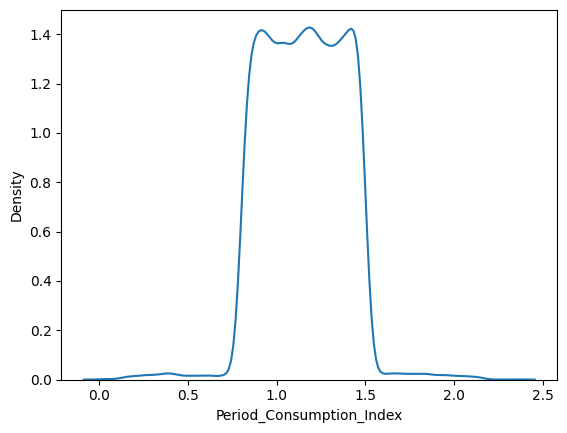

In [101]:
sns.kdeplot(df["Period_Consumption_Index"])

### Income_Level


In [104]:
df["Income_Level"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14000 entries, 0 to 13999
Series name: Income_Level
Non-Null Count  Dtype 
--------------  ----- 
13574 non-null  object
dtypes: object(1)
memory usage: 109.5+ KB


In [109]:
df["Income_Level"].value_counts()

Income_Level
Middle          5323
Upper Middle    3966
Low             2276
Rich            1593
`Y.&f              1
                ... 
mk8z:              1
@?6Du              1
\E>Y(              1
(GdBb              1
yePea              1
Name: count, Length: 420, dtype: int64

In [120]:
unique_levels = (
    df["Income_Level"].value_counts()[(df["Income_Level"].value_counts() > 1)].index
)
df[df["Income_Level"].isin(unique_levels)]

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption,Date,Hour
0,2002-01-01 00:00:00,1,Studio,15.310000,46.61,1.06,0.970000,Low,0,Swimming Pool,0.0,64.85,2002-01-01,0
1,2002-01-01 08:00:00,4,NaN,21.010000,66.11,2.98,0.910000,Upper Middle,1,Swimming Pool,1.0,192.50,2002-01-01,8
2,2002-01-01 16:00:00,2,Cottage,12.860000,60.86,1.44,1.430000,Middle,0,NaN,1.0,116.62,2002-01-01,16
3,2002-01-02 00:00:00,2,1BHK,20.160000,50.58,1.48,0.910000,Middle,-1,Garden,0.0,76.96,2002-01-02,0
4,2002-01-02 08:00:00,2,Cottage,16.230000,52.25,1.14,1.110000,Middle,0,Fountain,0.0,104.70,2002-01-02,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13994,2014-10-09 16:00:00,2,1BHK,26.520000,47.19,1.47,2.082106,Low,0,NaN,0.0,111.68,2014-10-09,16
13995,2014-10-10 00:00:00,2,1BHK,25.610000,61.50,1.70,0.940000,Low,0,NaN,0.0,78.59,2014-10-10,0
13996,2014-10-10 08:00:00,5,2BHK,13.270000,52.58,1.88,1.030000,Upper Middle,0,Garden,1.0,185.50,2014-10-10,8
13997,2014-10-10 16:00:00,4,2BHK,22.566559,46.93,1.22,1.100000,Middle,0,NaN,1.0,180.28,2014-10-10,16


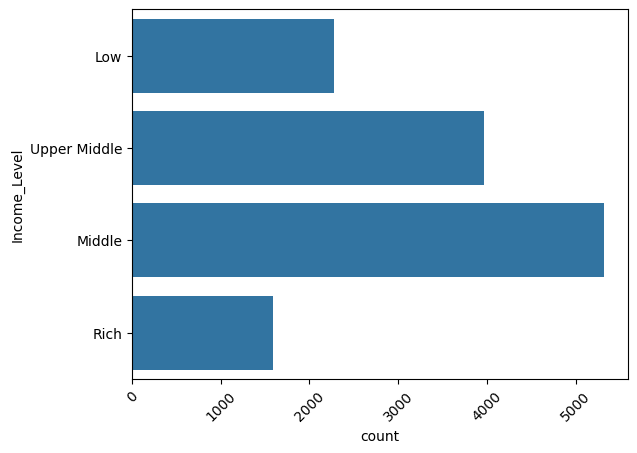

In [125]:
sns.countplot(df[df["Income_Level"].isin(unique_levels)]["Income_Level"])
plt.xticks(rotation=45)
plt.show()

In [127]:
(len(df[~df["Income_Level"].isin(unique_levels)]) / len(df)) * 100

6.014285714285714

---


In [79]:
df_test = pd.read_csv("../data/raw/test.csv")

In [99]:
df_test[df_test["Period_Consumption_Index"] < 0]

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage
5407,18/09/2019 00,3,1BHK,14.72,67.93,1.05,-0.012634,Low,0,Garden,NaN


In [31]:
df_test["Humidity"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6000 entries, 0 to 5999
Series name: Humidity
Non-Null Count  Dtype 
--------------  ----- 
6000 non-null   object
dtypes: object(1)
memory usage: 47.0+ KB


In [32]:
(
    len(df_test[~df_test["Humidity"].str.match(r"^\d*\.?\d*$", na=False)])
    / len(df_test)
) * 100

3.2333333333333334

In [33]:
df_test[~df_test["Humidity"].str.match(r"^\d*\.?\d*$", na=False)]

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage
63,01/11/2014 16,2,Studio,11.43,BbFaV,1.46,1.44,Low,0,Jacuzzi,0.0
97,13/11/2014 00,3,2BHK,24.39,&U6XK,1.05,1.18,Middle,0,NaN,0.0
103,15/11/2014 00,3,2BHK,25.07,"^.)0""",1.72,1.48,Upper Middle,0,Fountain,0.0
110,17/11/2014 08,4,Detached,19.41,'sEq/,1.58,1.22,Rich,0,Swimming Pool,0.0
160,04/12/2014 00,3,Bungalow,11.88,=^7uV,2.95,1.25,Upper Middle,0,Garden,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5649,07/12/2019 16,4,Detached,34.98,RivbR,2.77,1.14,Rich,1,Jacuzzi,0.0
5775,18/01/2020 16,3,3BHK,26.07,h29{-,2.41,0.81,Upper Middle,1,NaN,0.0
5816,01/02/2020 08,3,2BHK,16.71,[#9Y{,1.14,1.22,Middle,0,NaN,1.0
5837,08/02/2020 08,2,1BHK,12.73,6\3;j,1.61,0.86,Low,1,Garden,1.0


In [34]:
df_test.loc[~df_test["Humidity"].str.match(r"^\d*\.?\d*$", na=False), "Humidity"] = (
    np.nan
)

In [35]:
df_test["Humidity"] = df_test["Humidity"].astype("float64")

In [36]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 6000 non-null   object 
 1   Residents                 6000 non-null   int64  
 2   Apartment_Type            5834 non-null   object 
 3   Temperature               5850 non-null   float64
 4   Humidity                  5806 non-null   float64
 5   Water_Price               6000 non-null   float64
 6   Period_Consumption_Index  6000 non-null   float64
 7   Income_Level              5835 non-null   object 
 8   Guests                    6000 non-null   int64  
 9   Amenities                 3487 non-null   object 
 10  Appliance_Usage           5823 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 515.8+ KB


In [37]:
df_test["Humidity"].describe()

count    5806.000000
mean       53.215663
std        10.328575
min        17.370000
25%        46.275000
50%        53.325000
75%        60.020000
max        90.000000
Name: Humidity, dtype: float64

In [85]:
df_test["Water_Price"].describe()

count    6000.000000
mean        0.579927
std         9.081304
min       -99.000000
25%         1.320000
50%         1.630000
75%         2.120000
max         3.000000
Name: Water_Price, dtype: float64

In [86]:
df_test[df_test["Water_Price"] < 0]

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage
30,21/10/2014 16,2,1BHK,18.49,80.0,-88.0,1.380000,Low,0,NaN,0.0
158,03/12/2014 08,3,Cottage,15.70,54.69,-44.0,1.220000,Middle,0,NaN,0.0
277,12/01/2015 00,3,1BHK,25.55,50.33,-11.0,1.070000,Middle,0,NaN,NaN
364,10/02/2015 00,4,2BHK,31.42,50.89,-88.0,1.160000,Upper Middle,1,NaN,0.0
450,10/03/2015 16,5,2BHK,21.82,55.81,-22.0,1.460000,Upper Middle,0,Fountain,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5846,11/02/2020 08,5,2BHK,29.41,47.54,-99.0,0.820000,Upper Middle,0,Swimming Pool,0.0
5852,13/02/2020 08,5,Detached,32.62,55.74,-22.0,1.420000,NaN,0,Fountain,0.0
5883,23/02/2020 16,3,2BHK,34.68,23.31,-22.0,0.910000,Upper Middle,0,Swimming Pool,1.0
5972,24/03/2020 08,3,NaN,15.62,58.28,-77.0,2.118101,Middle,1,Garden,0.0
